In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
# you'll need to unzip the VAERS data for script to run and adjust file locations as needed
# .csv is too large for upload to github
# File downloaded from VAERS 2021-08-03 approx 11:55pm ADT
Data = pd.read_csv('data/2021VAERSData/2021VAERSDATA.csv', encoding='iso-8859-1')
Symptoms = pd.read_csv('data/2021VAERSData/2021VAERSSYMPTOMS.csv', encoding='iso-8859-1')
Vax = pd.read_csv('data/2021VAERSData/2021VAERSVAX.csv', encoding='iso-8859-1')

/Users/mischafubler/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
# inspector = df[['VAERS_ID','RECVDATE','RPT_DATE','STATE', 'AGE_YRS', 'SEX','SYMPTOM_TEXT','DIED','OTHER_MEDS','CUR_ILL','HISTORY','SPLTTYPE']]
inspector = Data.set_index('VAERS_ID').join(Vax.set_index('VAERS_ID'))
inspector['VAX_MANU']
# print(inspector)

VAERS_ID
916600             MODERNA
916601             MODERNA
916602     PFIZER\BIONTECH
916603             MODERNA
916604             MODERNA
                ...       
1497722    PFIZER\BIONTECH
1497724    PFIZER\BIONTECH
1497725    PFIZER\BIONTECH
1497726            MODERNA
1497727    PFIZER\BIONTECH
Name: VAX_MANU, Length: 445358, dtype: object

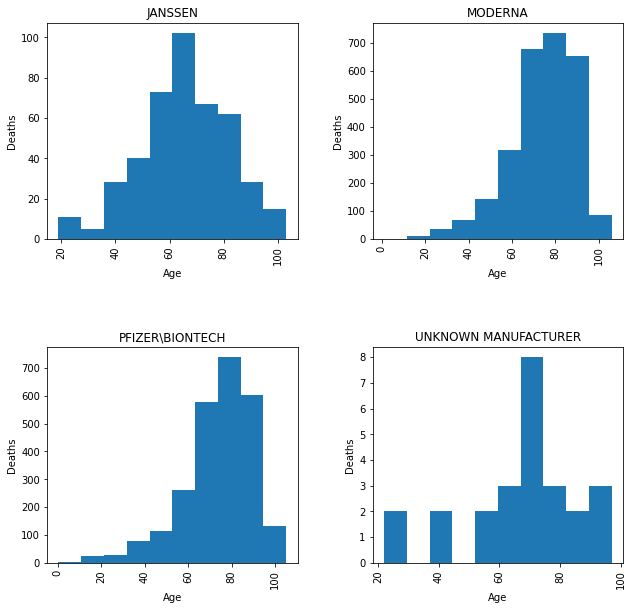

In [14]:
deaths = inspector[(inspector.VAX_TYPE == 'COVID19') & (inspector.DIED == 'Y')]

label = deaths.hist(column='AGE_YRS', by = 'VAX_MANU', figsize= (10,10))
# label = deaths.plot.bar(column='AGE_YRS', by = 'VAX_MANU', figsize= (10,10))

for lab in label.flatten():
    lab.set_xlabel('Age')
    lab.set_ylabel('Deaths')


In [15]:
total = inspector.DIED.count()
print(total)

6407
